In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy as sc
from scipy import integrate, optimize
from scipy.fftpack import fft

In [2]:
def sir_basic(y, t, beta, gamma):
    S,I,R = y
    
    dSdt = -beta*S*I
    dIdt = beta*S*I - gamma*I
    dRdt = gamma*I
    
    
    return [dSdt, dIdt, dRdt]

def plotting(model, N, infected, beta, gamma):

    I0 = infected/N
    S0 = 1 - I0
    R0 = 0
    y0 = S0, I0, R0
    
    t = np.linspace(0, 100, 500)
    
    sol = sc.integrate.odeint(model, y0, t, args=(beta, gamma))

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(16, 5)
    ax1.plot(t, sol[:, 0], label = 'Susceptible')
    ax1.plot(t, sol[:, 1], label = 'Infected')
    ax1.plot(t, sol[:, 2], label = 'Recovered')
    ax1.set_xlabel("time (in days)")
    ax1.set_ylabel("fraction of population")
    ax1.set_title("the naïve SIR model")
    ax1.legend()
    ax1.set_xlim(0,100)

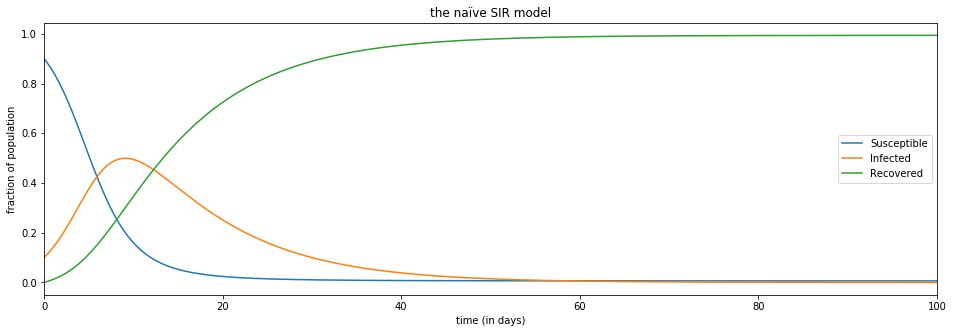

In [3]:
plotting(sir_basic, 1000, 100, 0.5, 0.1)

## phase plots et al

Text(0.33333333333333337, -0.05, '1/R0')

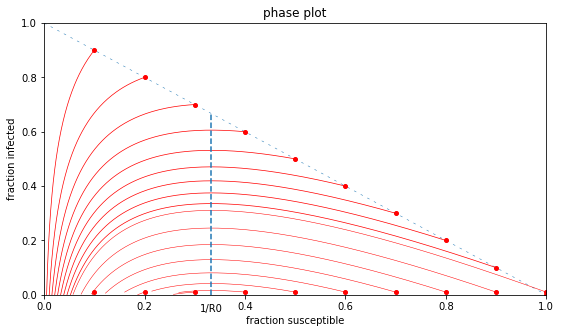

In [4]:
fig, ax = plt.subplots(figsize=(9,5))
ax.set_title("phase plot")
ax.set_xlabel("fraction susceptible")
ax.set_ylabel("fraction infected")
ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.plot([0,1],[1,0], '--', dashes=(5, 10), linewidth=0.5)


t = np.linspace(0,100,1000)

beta = 0.3
gamma = 0.1

for i in range(1,11):
    S = i/10
    I = 1 - S
    R = 0
    
    x0 = [S,I,R]
    
    sol = sc.integrate.odeint(sir_basic, x0, t, args=(beta, gamma))
    
    ax.plot(sol[:,0],sol[:,1], 'r', linewidth=0.7)
    ax.plot(S, I, 'ro', markersize=4)
    
    S = i/10
    I = 0.01
    R = 0
    
    x0 = [S,I,R]
    
    sol = sc.integrate.odeint(sir_basic, x0, t, args=(beta, gamma))
    
    ax.plot(sol[:,0],sol[:,1], 'r', linewidth=0.5)
    ax.plot(S, I, 'ro', markersize=4)
    
x = 1/(beta/gamma)
ax.axvline(x, 0, 0.67, ls = '--', label='PAHs')
ax.text(x, -0.05, '1/R0', horizontalalignment='center', verticalalignment='center')

/Users/tristen.assenmacher/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


The following parameters where found:
      Beta = 3.006353756797928
      gamma = 0.5284379259980706
      


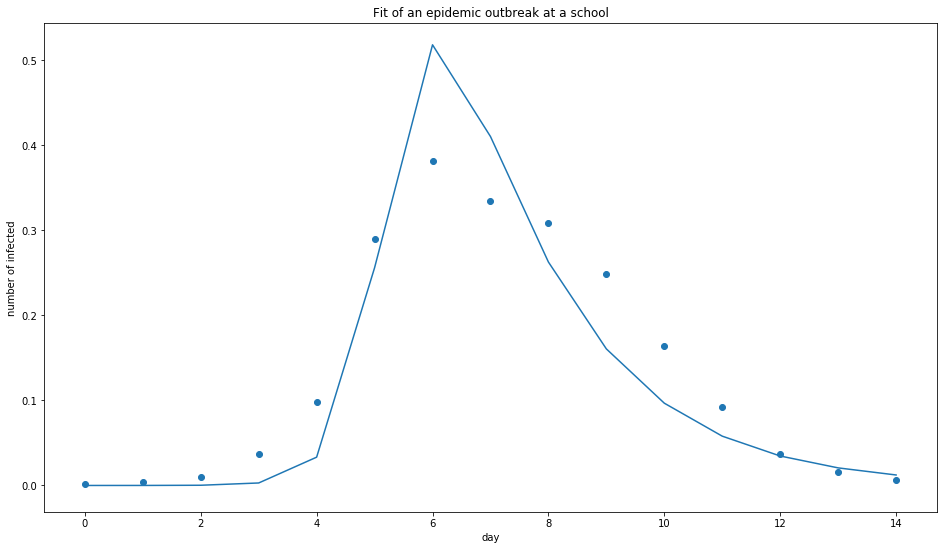

In [5]:
#fit the sir model to initial conditions
n = 763
day = [i for i in range(0,15)]
number = np.array([1, 3, 8, 28, 75, 221, 291, 255, 235, 190, 125, 70, 28, 12, 5])/n

I = number[0]/n
S = 1 - I
x0 = [S, I, 0]

#function which integrates the ODE
def sir_basic(y, t, beta, gamma):
    S,I,R = y
    
    dSdt = -beta*S*I
    dIdt = beta*S*I - gamma*I
    dRdt = gamma*I
    
    return [dSdt, dIdt, dRdt]

def fit_odeint(t, beta, gamma):
    return sc.integrate.odeint(sir_basic, x0, t, args=(beta, gamma))[:,1]

popt, pcov = sc.optimize.curve_fit(fit_odeint, day, number)
fitted = fit_odeint(day, *popt)

#figure
fig, ax = plt.subplots(figsize=(16,9))
ax.set_title("Fit of an epidemic outbreak at a school")
ax.set_xlabel("day")
ax.set_ylabel("number of infected")

#plot
ax.scatter(day, number)
ax.plot(day, fitted)

print(f"""The following parameters where found:
      Beta = {popt[0]}
      gamma = {popt[1]}
      """)

## SIR model with demography

In [6]:
def sir_advanced(y, t, beta, gamma, mu):
    S, I, R = y
    
    dSdt = mu - mu*S - beta*S*I
    dIdt = beta*S*I - gamma*I - mu*I
    dRdt = gamma*I - mu*R
    
    return [dSdt, dIdt, dRdt]

def plotting2(model, N, infected, susceptible, beta, gamma, mu):

    I0 = infected/N
    S0 = susceptible/N
    R0 = 1 - I0 - S0
    y0 = S0, I0, R0
    
    t = np.linspace(0, 365, 1000)
    
    sol = sc.integrate.odeint(model, y0, t, args=(beta, gamma, mu))

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(16, 5)
    ax1.plot(t, sol[:, 0], label = 'Susceptible')
    ax1.plot(t, sol[:, 1], label = 'Infected')
    ax1.plot(t, sol[:, 2], label = 'Recovered')
    ax1.set_xlabel("time (in days)")
    ax1.set_ylabel("fraction of population")
    ax1.set_title("the SIR model with demography")
    ax1.legend()
    ax1.set_xlim(0,365)

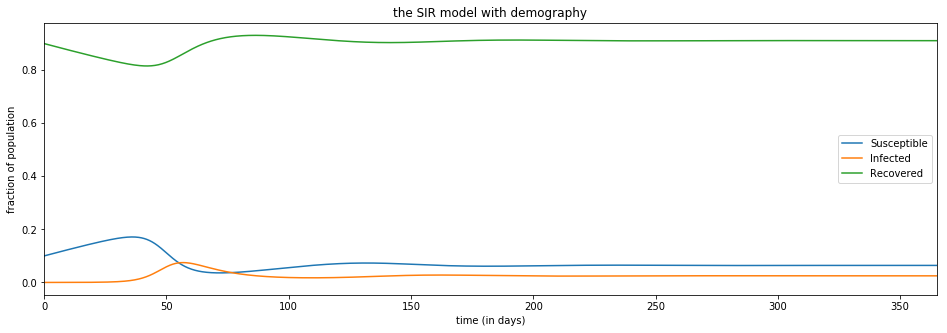

In [7]:
plotting2(sir_advanced, 10000, 1, 1000, 1.6, 1/10.0, 1/365.0)

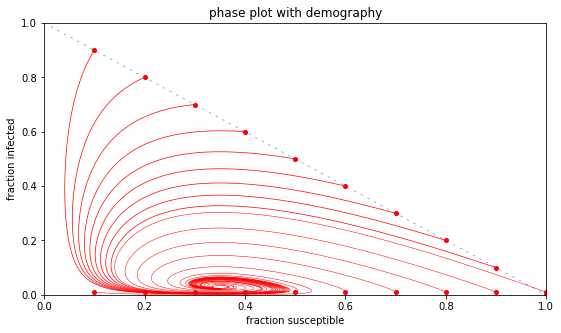

In [8]:
fig, ax = plt.subplots(figsize=(9,5))
ax.set_title("phase plot with demography")
ax.set_xlabel("fraction susceptible")
ax.set_ylabel("fraction infected")
ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.plot([0,1],[1,0], '--', dashes=(5, 10), linewidth=0.5)


t = np.linspace(0,100,1000)

beta = 1
gamma = 1/3
mu = 1/60

for i in range(1,11):
    S = i/10
    I = 1 - S
    R = 0
    
    x0 = [S,I,R]
    
    sol = sc.integrate.odeint(sir_advanced, x0, t, args=(beta, gamma, mu))
    
    ax.plot(sol[:,0],sol[:,1], 'r', linewidth=0.7)
    ax.plot(S, I, 'ro', markersize=4)
    
    S = i/10
    I = 0.01
    R = 0
    
    x0 = [S,I,R]
    
    sol = sc.integrate.odeint(sir_advanced, x0, t, args=(beta, gamma, mu))
    
    ax.plot(sol[:,0],sol[:,1], 'r', linewidth=0.5)
    ax.plot(S, I, 'ro', markersize=4)

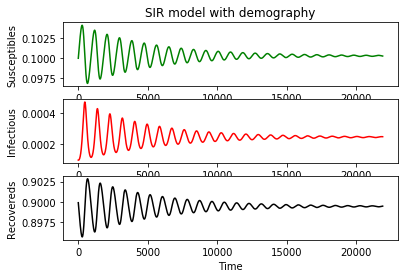

In [9]:
#Code used from the website of Keeling and Rohani: http://modelinginfectiousdiseases.org/

import scipy.integrate as spi
import numpy as np
import pylab as pl

mu=1/(365*70)
beta=520/365.0
gamma=1/7.0
TS=1.0
ND=365*60
S0=0.1
I0=1e-4
R0=1-S0-I0
INPUT = (S0, I0, R0)

def sir_demo(INP,t):  
    
    Y=np.zeros((3))
    V = INP    
    Y[0] = mu - beta * V[0] * V[1] - mu * V[0]
    Y[1] = beta * V[0] * V[1] - gamma * V[1] - mu * V[1]
    Y[2] = gamma * V[1] - mu * V[2]
    return Y



t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = sc.integrate.odeint(sir_demo,INPUT,t_range)

#Ploting
pl.subplot(311)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.title('SIR model with demography')
pl.xlabel('Time')
pl.ylabel('Susceptibles')
pl.subplot(312)
pl.plot(RES[:,1], '-r', label='Infectious')
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.subplot(313)
pl.plot(RES[:,2], '-k', label='Recovereds')
pl.xlabel('Time')
pl.ylabel('Recovereds')
pl.show()

## Infection induced mortality

In [23]:
rho=0.5
mu=1/(70*365.0)
beta=520/365.0
gamma=1/7.0
TS=1.0
ND=1e5
N0=1
X0=0.2
Y0=1e-4
Z0=N0-X0-Y0
INPUT = (X0, Y0, Z0)

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)

def sir_mortality(INP,t):  
    
    Y=np.zeros((3))
    V = INP    
    Y[0] = mu - beta * V[0] * V[1] / sum(V) - mu * V[0]
    Y[1] = beta * V[0] * V[1] / sum(V) - (gamma + mu) * V[1]/(1-rho)
    Y[2] = gamma * V[1] - mu * V[2]
    return Y

RES = sc.integrate.odeint(sir_mortality,INPUT,t_range)

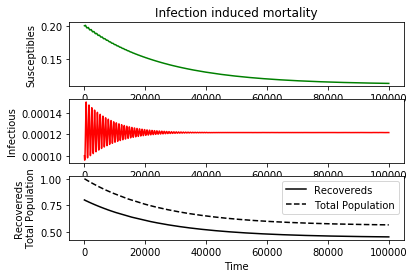

In [25]:
pl.subplot(311)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.title('Infection induced mortality')
pl.xlabel('Time')
pl.ylabel('Susceptibles')
pl.subplot(312)
pl.plot(RES[:,1], '-r', label='Infectious')
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.subplot(313)
pl.plot(RES[:,2], '-k', label='Recovereds')
pl.plot(sum((RES[:,0],RES[:,1],RES[:,2])), '--k', label='Total Population')
pl.xlabel('Time')
pl.legend(loc=0)
pl.ylabel('Recovereds\nTotal Population')
pl.show()

## SEIR and temporal forcing

In [33]:
def seir(INP,t):  
    
    Y=np.zeros((3))
    V = INP    
    Y[0] = mu - beta * V[0] * V[2] - mu * V[0]
    Y[1] = beta * V[0] * V[2] - sigma * V[1] - mu * V[1]
    Y[2] = sigma * V[1] - gamma * V[2] - mu * V[2]
    return Y

def seirt(INP,t):  
    
    Y=np.zeros((3))
    V = INP
    beta = beta0 * (1 + beta1 * np.sin(2*np.pi*t/365))
    Y[0] = mu - beta * V[0] * V[2] - mu * V[0]
    Y[1] = beta * V[0] * V[2] - sigma * V[1] - mu * V[1]
    Y[2] = sigma * V[1] - gamma * V[2] - mu * V[2]
    return Y

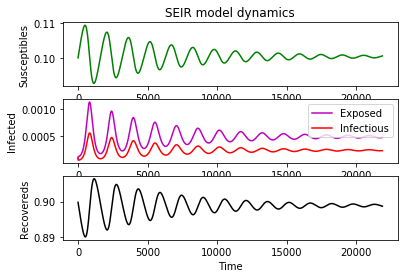

In [34]:
mu=1/(70*365.0)
beta=520/365.0
sigma=1/14.0
gamma=1/7.0
ND=60*365.0
TS=1.0
S0=0.1
E0=1e-4
I0=1e-4
INPUT = (S0, E0, I0)

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = sc.integrate.odeint(seir,INPUT,t_range)

dRdt=1. - (RES[:,0]+RES[:,1]+RES[:,2])

#Ploting normal
pl.subplot(311)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.title('SEIR model dynamics')
pl.xlabel('Time')
pl.ylabel('Susceptibles')
pl.subplot(312)
pl.plot(RES[:,1], '-m', label='Exposed')
pl.plot(RES[:,2], '-r', label='Infectious')
pl.legend(loc=1)
pl.xlabel('Time')
pl.ylabel('Infected')
pl.subplot(313)
pl.plot(dRdt, '-k', label='Recovereds')
pl.xlabel('Time')
pl.ylabel('Recovereds')
pl.show()

Text(0, 0.5, 'Recovereds')

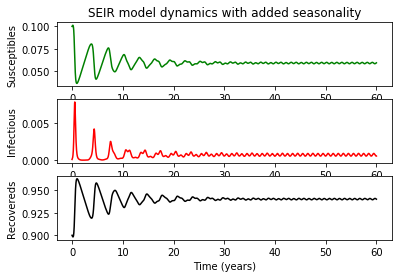

In [36]:
beta0=17/13.0;
beta1=0.1;
gamma=1/13.0;
mu=1/(50*365.0);
S0=1/17.0;
I0=1e-4;
ND=MaxTime=60*365.0;
TS=1.0

t=(np.arange(ND)/365.)

RES = sc.integrate.odeint(seirt,INPUT,t_range)

pl.subplot(311)
pl.plot(t,RES[1:,0], 'g', label='S')
pl.title('SEIR model dynamics with added seasonality')
pl.xlabel ('Time (years)')
pl.ylabel ('Susceptibles')
pl.subplot(312)
pl.plot(t,RES[1:,1], 'r', label='I')
pl.xlabel ('Time (years)')
pl.ylabel ('Infectious')
pl.subplot(313)
pl.plot(t,1-(RES[1:,0]+RES[1:,1]), 'k', label='R')
pl.xlabel ('Time (years)')
pl.ylabel ('Recovereds')
